In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
%matplotlib inline

# Inits
seaborn.set_theme()
seaborn.set_style("darkgrid")

# Kaggle Path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
# FilePath
path = "/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv"

# Dataframe
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# EDA

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
df.describe(include="object").T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [7]:
# Unique Values
for column in df.columns:
    print(f"{column}'s Unique Value")
    print("=" * 45)
    print(df[column].unique())
    print()

id's Unique Value
[ 9046 51676 31112 ... 19723 37544 44679]

gender's Unique Value
['Male' 'Female' 'Other']

age's Unique Value
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

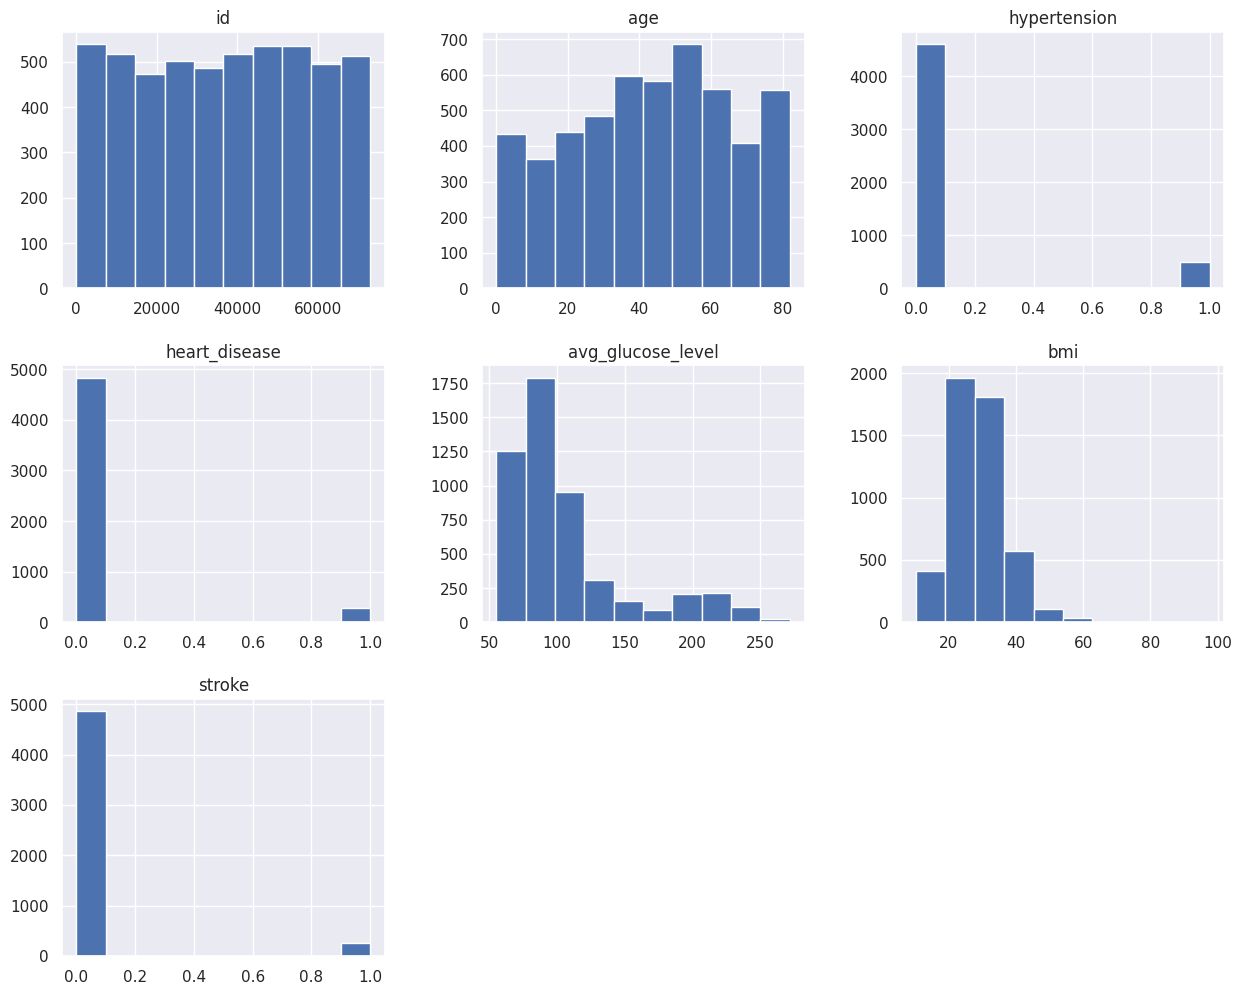

In [8]:
# Distributions
df.hist(figsize=(15,12))

<Axes: xlabel='gender', ylabel='count'>

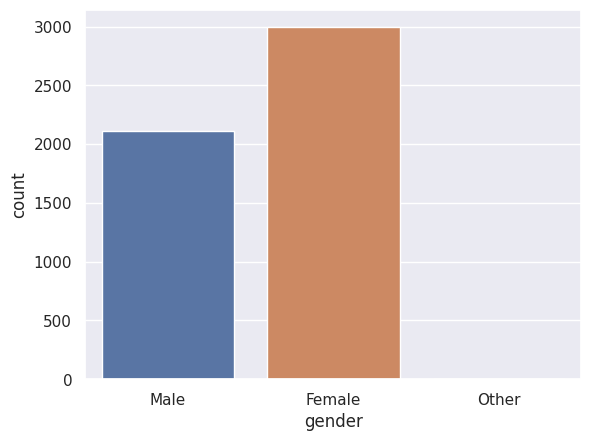

In [9]:
# Countplot
categorical_col = df.select_dtypes(include="object").columns.tolist()
seaborn.countplot(data=df, x=categorical_col[0])

<Axes: xlabel='ever_married', ylabel='count'>

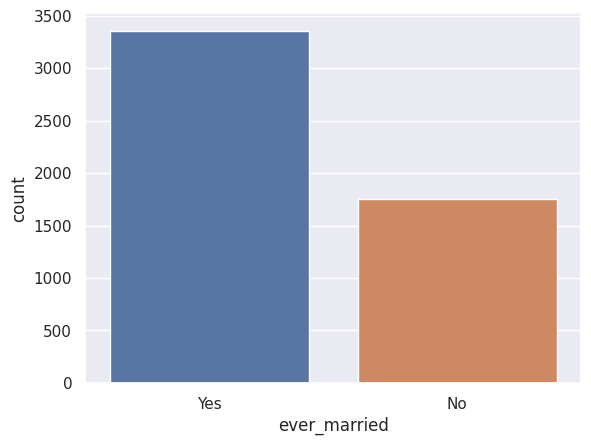

In [10]:
seaborn.countplot(data=df, x=categorical_col[1])

<Axes: xlabel='work_type', ylabel='count'>

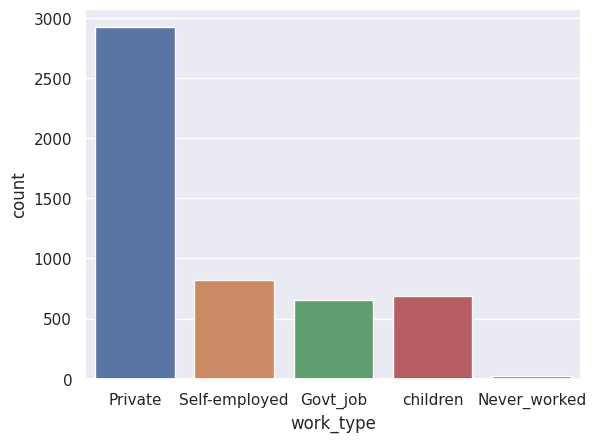

In [11]:
seaborn.countplot(data=df, x=categorical_col[2])

<Axes: xlabel='Residence_type', ylabel='count'>

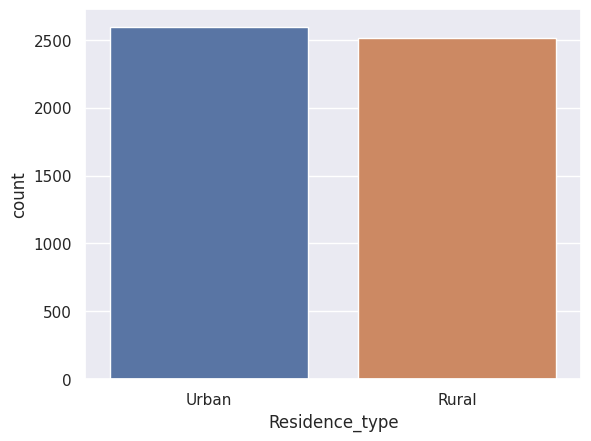

In [12]:
seaborn.countplot(data=df, x=categorical_col[3])

<Axes: xlabel='smoking_status', ylabel='count'>

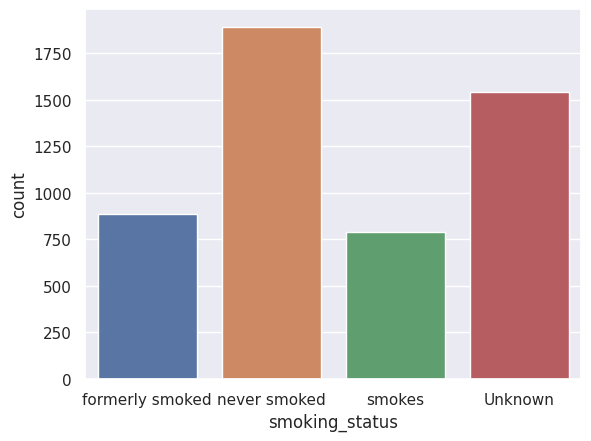

In [13]:
seaborn.countplot(data=df, x=categorical_col[4])

<Axes: xlabel='gender', ylabel='bmi'>

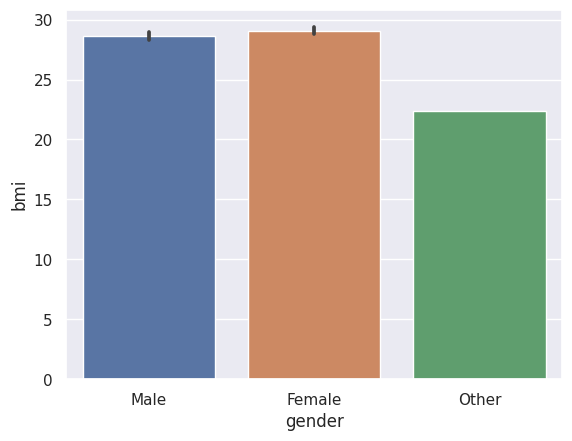

In [14]:
# Gender vs BMI barchart
seaborn.barplot(data=df, x="gender", y="bmi")

<Axes: xlabel='avg_glucose_level', ylabel='gender'>

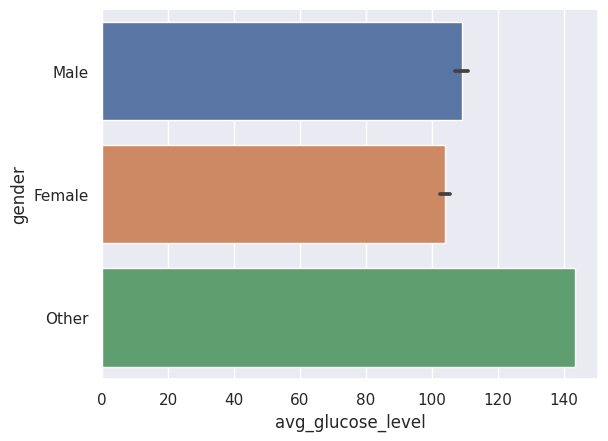

In [15]:
# Gender vs avg_glucose_level
seaborn.barplot(data=df, x="avg_glucose_level", y="gender")

<Axes: xlabel='heart_disease', ylabel='gender'>

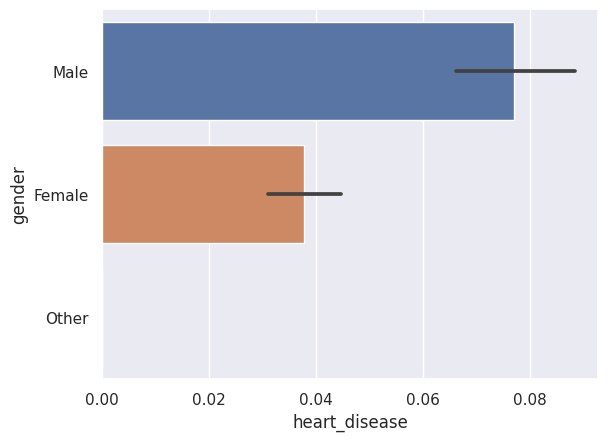

In [16]:
# Gender vs Heart diseases
seaborn.barplot(data=df, x="heart_disease", y="gender")

<Axes: xlabel='age', ylabel='work_type'>

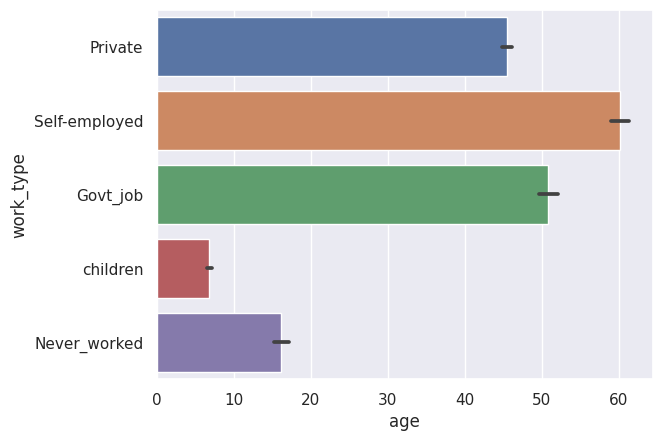

In [17]:
# WorkType vs Age
seaborn.barplot(data=df, y="work_type", x="age")

<Axes: xlabel='heart_disease', ylabel='age'>

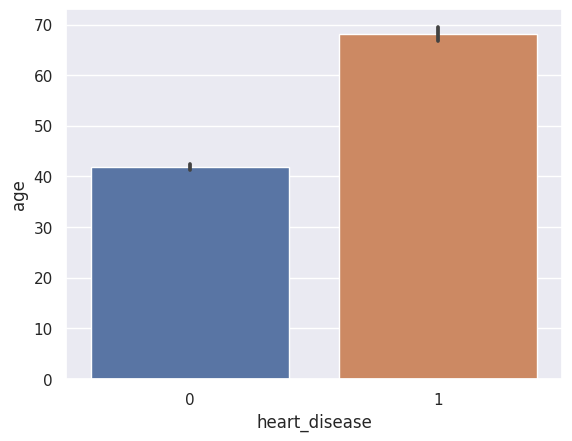

In [18]:
# Heart disease vs Age
seaborn.barplot(data=df, x="heart_disease", y="age")

<Axes: xlabel='ever_married', ylabel='age'>

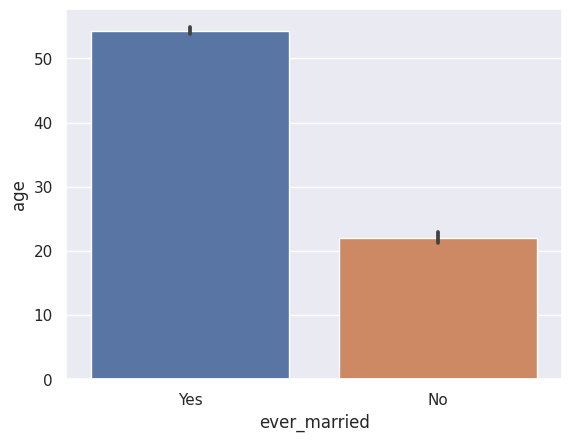

In [19]:
# ever_married vs age
seaborn.barplot(data=df, x="ever_married", y="age")

<Axes: xlabel='ever_married', ylabel='hypertension'>

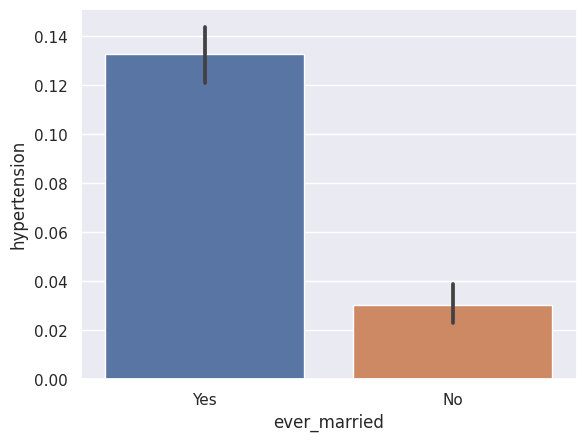

In [20]:
# ever_married vs hypertension
seaborn.barplot(data=df, x="ever_married", y="hypertension")

<Axes: xlabel='smoking_status', ylabel='heart_disease'>

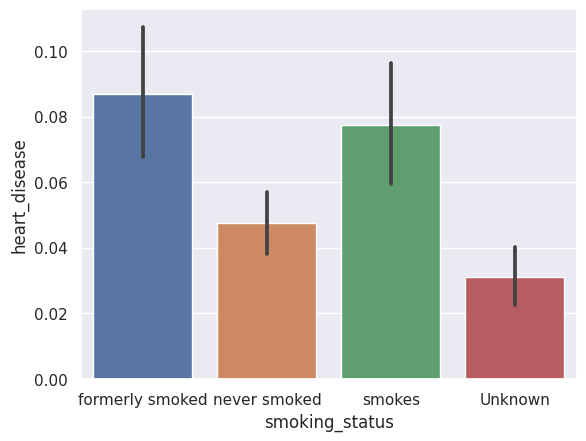

In [21]:
# Smoking_status vs heart_disease
seaborn.barplot(data=df, y="heart_disease", x="smoking_status")

In [22]:
# Profile Report
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preparation

In [23]:
# Missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Handling Missing Value

In [24]:
# MeanImputation
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [25]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data Encoding

In [26]:
encodedNoDrop = pd.get_dummies(df)
encodedDrop = pd.get_dummies(df, drop_first=True)

In [27]:
# Current DF
df = encodedNoDrop

## Features and label splitting

In [28]:
features = df.drop('stroke',axis=1)
label = df['stroke']
ftrain, ftest, ltrain, ltest = train_test_split(features, label, random_state=42, test_size=.2)

# Model Training

In [29]:
# Models
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=2)

In [30]:
# Fit into models
LR.fit(ftrain, ltrain)
DT.fit(ftrain, ltrain)
RF.fit(ftrain, ltrain)
NB.fit(ftrain, ltrain)
KNN.fit(ftrain, ltrain)

KNeighborsClassifier(n_neighbors=2)

# Predictions

In [31]:
LRPred = LR.predict(ftest)
DTPred = DT.predict(ftest)
RFPred = RF.predict(ftest)
NBPred = NB.predict(ftest)
KNNPred = KNN.predict(ftest)

# Accuracy

## Confusion Matrix

In [32]:
LRcm = confusion_matrix(ltest, LRPred)

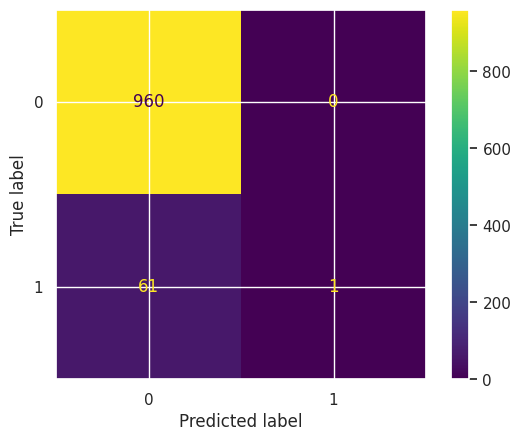

In [33]:
ConfusionMatrixDisplay(LRcm).plot()

## Classification Report

In [34]:
print(classification_report(ltest, LRPred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022

